In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#import model building libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#2.configure image data generator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
#3.Apply image data generator functionality to train and test images
x_train=train_datagen.flow_from_directory(r'drive/MyDrive/train/dataset',target_size=(64,64),batch_size=32,class_mode="categorical")
x_test = test_datagen.flow_from_directory(r'drive/MyDrive/test',target_size = (64,64),batch_size=32,class_mode="categorical")

Found 4217 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [ ]:
print(x_train.class_indices)

{'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}


In [ ]:
model=Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [ ]:
#add max pool layer(pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#add flatten layer  ---input of ann
model.add(Flatten())

In [ ]:
#ann hidden layer
model.add(Dense(units=128,activation="relu"))

In [ ]:
#add output layer
model.add(Dense(units=4,activation="softmax"))

In [ ]:
#Compile the model (loss fucntion,accuracy,optimizer)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")

In [ ]:
#fit model (x_train,steps_per epoch,epochs,validation_data,validation_steps)
history=model.fit(x_train,epochs=100,validation_data=x_test,validation_steps=10)

Epoch 1/100
132/132 [==============================] - 1250s 9s/step - loss: 1.1970 - accuracy: 0.4902 - val_loss: 0.9345 - val_accuracy: 0.6062
Epoch 2/100
132/132 [==============================] - 83s 628ms/step - loss: 0.8893 - accuracy: 0.6163 - val_loss: 0.9106 - val_accuracy: 0.6000
Epoch 3/100
132/132 [==============================] - 71s 532ms/step - loss: 0.7988 - accuracy: 0.6690 - val_loss: 0.7853 - val_accuracy: 0.6656
Epoch 4/100
132/132 [==============================] - 69s 520ms/step - loss: 0.7413 - accuracy: 0.6967 - val_loss: 0.6856 - val_accuracy: 0.7500
Epoch 5/100
132/132 [==============================] - 81s 613ms/step - loss: 0.6943 - accuracy: 0.7133 - val_loss: 0.6842 - val_accuracy: 0.6875
Epoch 6/100
132/132 [==============================] - 71s 537ms/step - loss: 0.6691 - accuracy: 0.7195 - val_loss: 0.6867 - val_accuracy: 0.7312
Epoch 7/100
132/132 [==============================] - 71s 538ms/step - loss: 0.6552 - accuracy: 0.7344 - val_loss: 0.5886 - 

In [ ]:
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
model.summary()
# Print the accuracy
print("Training Accuracy :",train_accuracy)
print("value Accuracy :", val_accuracy)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 3,937,796
Trainable params: 3,937,796
Non-trainable params: 0
______________________________________________

In [ ]:
model.save("EyeDisU.h5")

Testing the model

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [2]:
import tensorflow as tf

In [4]:
model=tf.keras.models.load_model(r"/content/EyeDisU.h5",compile=False)

In [5]:
#D:\SmartBridge\VIT_morning_slot\dataset\Testing\elephants\nature_3306013__340.jpg
img=image.load_img(r'drive/MyDrive/test/cataract/_1_5346540.jpg',target_size=(64,64))

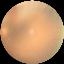

In [6]:
img


In [7]:
x=image.img_to_array(img)

In [8]:
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [9]:
x=np.expand_dims(x,axis=0)

In [10]:
x.ndim

4

In [11]:
x.shape

(1, 64, 64, 3)

In [12]:
pred=model.predict(x)

1/1 [==============================] - 0s 194ms/step


In [13]:
pred

array([[1., 0., 0., 0.]], dtype=float32)

In [14]:
{'catarct': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}

{'catarct': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}

In [15]:
pred_class=np.argmax(pred,axis=1)

In [16]:
pred_class[0]

0

In [17]:
index = ['cataract','diabetic_retinopathy','glaucoma','normal']
result = str(index[pred_class[0]])
print(result)

cataract


In [ ]:
pip install flask-ngrok